## import libraries

In [1]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import skimage as sk

## original image

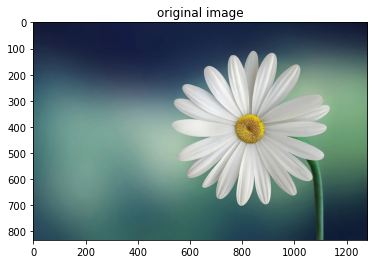

In [2]:
img=Image.open('image2.webp')
plt.imshow(img)
plt.title('original image')
plt.show()

## convert image to array and shape of the array

In [3]:
img_array = np.asarray(img)
img_shape=img_array.shape
img_shape

(833, 1280, 3)

## add noise to image

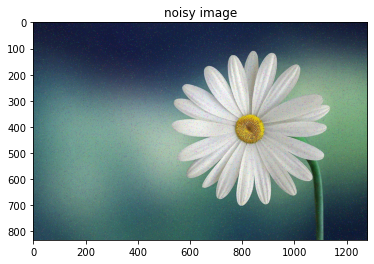

In [4]:
img_array_noise=sk.util.random_noise(img_array, mode='s&p',amount=0.02,salt_vs_pepper=0.3)
plt.imshow(img_array_noise)
plt.title('noisy image')
plt.show()

## split red and green and blue matrix of noisy image

In [5]:
red=img_array_noise[:,:,0]
green=img_array_noise[:,:,1]
blue=img_array_noise[:,:,2]

## SVD decomposition for each color

In [6]:
U1, s1, V1 = np.linalg.svd(red,full_matrices=False)
U2, s2, V2 = np.linalg.svd(green,full_matrices=False)
U3, s3, V3 = np.linalg.svd(blue,full_matrices=False)

## compress image with SVD for reduce noise

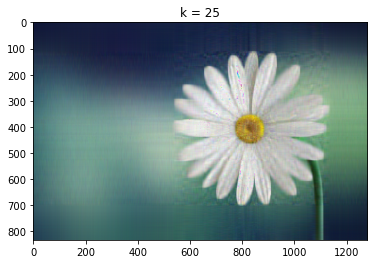

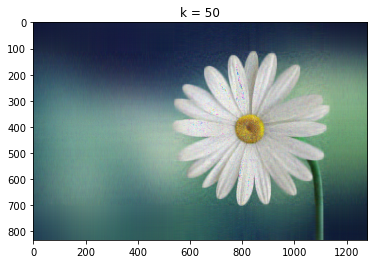

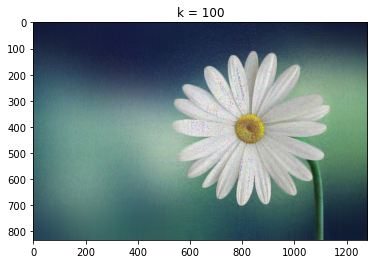

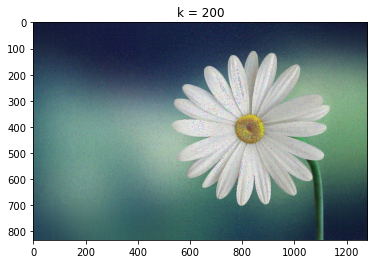

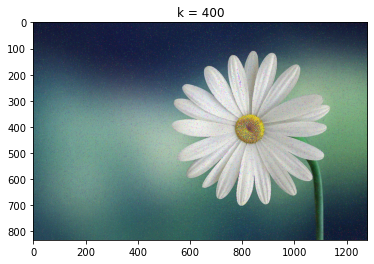

In [7]:
reconst=np.zeros(img_array.shape)
for i in [25,50,100,200,400]:
    reconst[: ,: ,0] = np.dot(U1[:, :i] , np.dot(np.diag(s1[:i]), V1[:i, :]))
    reconst[: ,: ,1] = np.dot(U2[:, :i] , np.dot(np.diag(s2[:i]), V2[:i, :]))
    reconst[: ,: ,2] = np.dot(U3[:, :i] , np.dot(np.diag(s3[:i]), V3[:i, :]))
    plt.imshow((reconst*255).astype(np.uint8))
    plt.title("k = %s" % i )
    plt.show()

## grayscale of image 

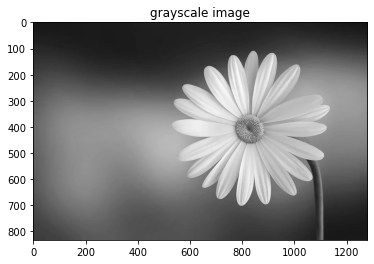

In [8]:
imgGray = img.convert('L')
plt.imshow(imgGray, cmap='gray')
plt.title("grayscale image")
plt.show()

## convert grayscale image to array and shape of the array

In [9]:
imgGray_array = np.asarray(imgGray)
imgGray_array.shape

(833, 1280)

## add noise to grayscale image

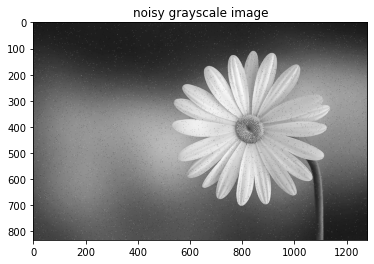

In [10]:
imgGray_array_noise=sk.util.random_noise(imgGray_array, mode='s&p',amount=0.01,salt_vs_pepper=0.3)
plt.imshow(imgGray_array_noise,cmap='gray')
plt.title("noisy grayscale image")
plt.show()

## SVD docomposition

In [11]:
U, s, V = np.linalg.svd(imgGray_array_noise,full_matrices=False)

## compress grayscale image with SVD for reduce noise

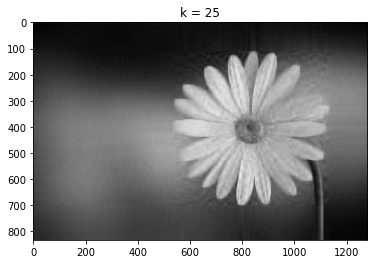

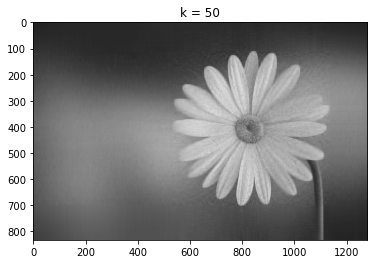

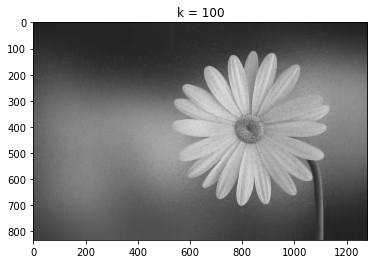

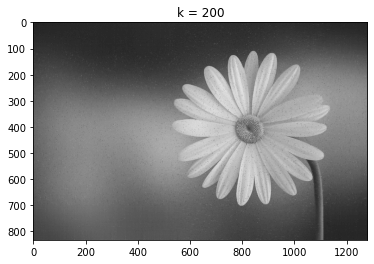

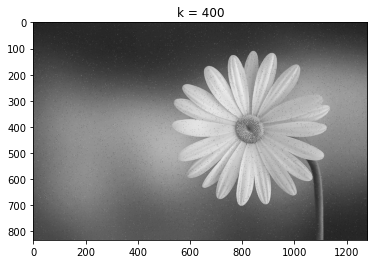

In [12]:
reconst=np.zeros(imgGray_array.shape)
for i in [25,50,100,200,400]:
    reconst = np.dot(U[:, :i] , np.dot(np.diag(s[:i]), V[:i, :]))
    plt.imshow(reconst, cmap='gray')
    plt.title("k = %s" % i)
    plt.show()